# Convolution on a Music/Audio Signal

This notebook demonstrates the application of convolution with different filters on an audio signal. We'll analyze how different filters affect the audio characteristics and visualize the results in both time and frequency domains.

## Import Required Libraries

First, let's import all the necessary libraries for audio processing, signal analysis, and visualization.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
from IPython.display import Audio, display, Markdown

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

## Load and Examine the Audio Signal

Let's load our audio file and examine its properties.

In [ ]:
# Load the audio file
sample_rate, audio_data = wavfile.read('W3KM.wav')

# Convert to mono if stereo
if len(audio_data.shape) > 1:
    audio_data = audio_data[:, 0]

# Normalize audio to range [-1, 1]
if audio_data.dtype == np.int16:
    audio_data = audio_data.astype(np.float32) / 32767.0
elif audio_data.dtype == np.int32:
    audio_data = audio_data.astype(np.float32) / 2147483647.0

# Calculate audio duration
duration = len(audio_data) / sample_rate

# Print audio information
markdown_table = f"""
**Audio Information:**
---
| Property       | Value          |
|----------------|----------------|
| Sample Rate    | {sample_rate} Hz |
| Duration       | {duration:.2f} seconds |
| Channels       | {audio_data.ndim} |
| Sample Count   | {len(audio_data)} |
| Data Type     | {audio_data.dtype} |
"""
display(Markdown(markdown_table))


# Take the first 10 seconds only if audio is longer
if duration > 10:
    audio_data = audio_data[:int(10 * sample_rate)]
    display(Markdown(f"> Truncated to first `10 seconds`: {len(audio_data)} samples"))


**Audio Information:**
---
| Property       | Value          |
|----------------|----------------|
| Sample Rate    | 44100 Hz |
| Duration       | 10.22 seconds |
| Channels       | 1 |
| Sample Count   | 450548 |
| Data Type     | float32 |


> Truncated to first `10 seconds`: 441000 samples

### Visualize the Original Signal

Let's visualize the waveform and frequency spectrum of the original audio.

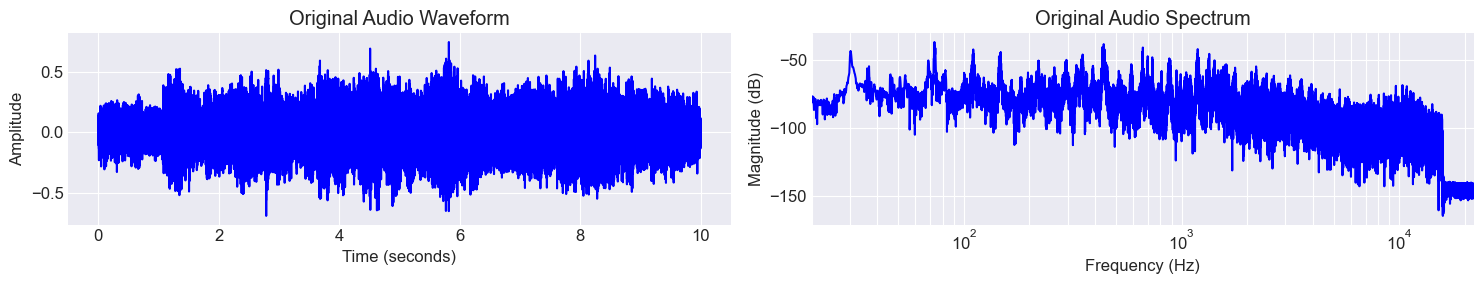

In [ ]:
def plot_waveform(signal_data, sr, title="Waveform", alpha=1.0, color='blue'):
    """Plot the waveform of an audio signal"""
    time = np.arange(0, len(signal_data)) / sr
    plt.plot(time, signal_data, alpha=alpha, color=color, label=title)
    plt.grid(True)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title(title)

def plot_spectrum(signal_data, sr, title="Frequency Spectrum", alpha=1.0, color='blue'):
    """Plot the frequency spectrum of an audio signal"""
    # Compute the FFT
    n = len(signal_data)
    yf = np.fft.rfft(signal_data)
    xf = np.fft.rfftfreq(n, 1 / sr)

    # Convert to magnitude in dB
    magnitude = 20 * np.log10(np.abs(yf) / n + 1e-10)

    # Plot the spectrum
    plt.semilogx(xf, magnitude, alpha=alpha, color=color, label=title)
    plt.grid(True, which="both")
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.title(title)
    plt.xlim(20, sr/2)  # Audible frequency range

# Plot the original waveform
plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
plot_waveform(audio_data, sample_rate, "Original Audio Waveform")

# Plot the original frequency spectrum
plt.subplot(1, 2, 2)
plot_spectrum(audio_data, sample_rate, "Original Audio Spectrum")
plt.tight_layout()
plt.show()

## Design Band-pass Filter for Convolution

In [ ]:
def create_bandpass_filter(lowcut, highcut, sample_rate, filter_order=5):
    """Create a band-pass filter using scipy.signal"""
    nyquist = 0.5 * sample_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = signal.butter(filter_order, [low, high], btype='band')
    return b, a

bandpass_b, bandpass_a = create_bandpass_filter(lowcut=500, highcut=3000, sample_rate=sample_rate)  # 500 Hz - 3 kHz

## Apply Filters to Audio Signal

Now, let's apply filter to our audio signal using convolution.

In [ ]:
filtered_bandpass = signal.lfilter(bandpass_b, bandpass_a, audio_data)

### Listen to Original & Filtered Audio

In [ ]:
# Function to play and display audio player
def play_audio(audio, sr, title):
    print(title)
    display(Audio(audio, rate=sr))

# Play the original audio
play_audio(audio_data, sample_rate, "Original Audio:")

# Play the filtered audio
play_audio(filtered_bandpass, sample_rate, "Band-Pass Filtered Audio:")

Original Audio:


Band-Pass Filtered Audio:


## Compare Waveforms and Frequency Spectra

Let's visualize how filter has affected the audio signal in both time and frequency domains.

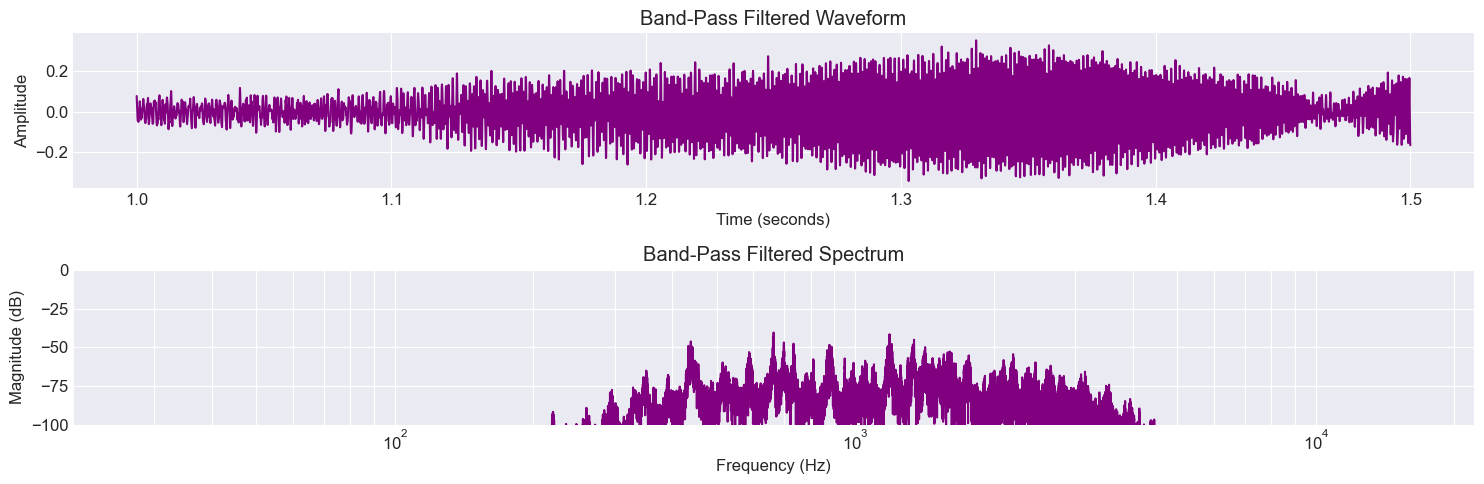

In [ ]:
# Time domain waveforms
plt.figure(figsize=(15, 5))

# Plot a smaller section (e.g., 0.5 seconds) for better visibility
section_start = int(1 * sample_rate)  # Start at 1 second
section_duration = int(0.5 * sample_rate)  # Show 0.5 seconds
section_end = section_start + section_duration

time_section = np.arange(section_start, section_end) / sample_rate

# Frequency domain spectrum
plt.subplot(2, 1, 1)
plt.plot(time_section, filtered_bandpass[section_start:section_end], label='Band-Pass', color='purple')
plt.title('Band-Pass Filtered Waveform')
plt.grid(True)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.title('Band-Pass Filtered Spectrum')
plot_spectrum(filtered_bandpass, sample_rate, "Band-Pass Filtered Spectrum", color='purple')
plt.ylim(-100, 0)

plt.tight_layout()
plt.show()

## Overlay Comparison of Original vs. Filtered

Let's overlay the original and filtered signals to better visualize the differences.

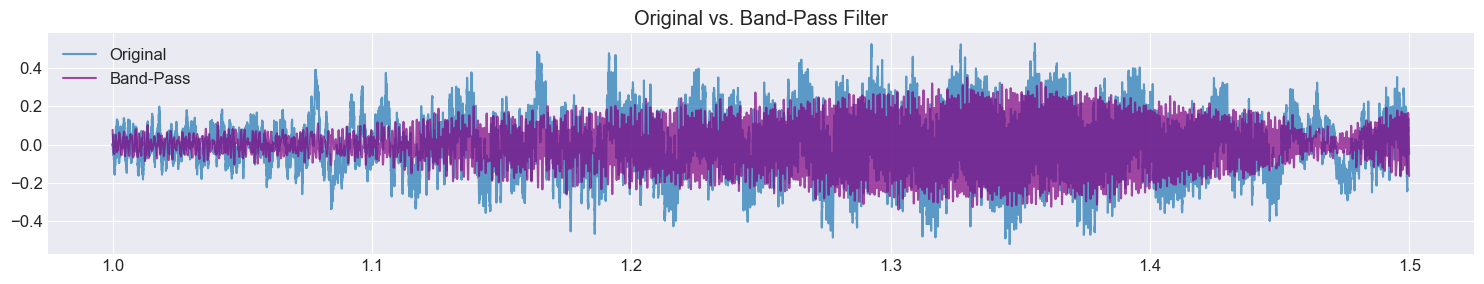

In [ ]:
# Compare waveforms (overlay)
plt.figure(figsize=(15, 3))

plt.plot(time_section, audio_data[section_start:section_end], alpha=0.7, label='Original')
plt.plot(time_section, filtered_bandpass[section_start:section_end], alpha=0.7, color='purple', label='Band-Pass')
plt.title('Original vs. Band-Pass Filter')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()